### 590D Mini Exercise-2

###  Group Members : Krishna Prasad Sankaranarayanan ad Vinayak Mathur

Implement Count Min Sketch and plot the frequency of all elements as reported by the Count Min sketch data structure as well as their true frequencies using  ε = 0.01 and number of hash functions = 25.

In [25]:
import math
from random import randint
import random
import numpy as np
import matplotlib.pyplot as plt

In [26]:
a = [] # paramterer for calculating hash functions
b = [] # paramterer for calculating hash functions

# number of stream elements
stream_count = 10000 #Number of elements
p = 1000003 #Prime Number for calculating hash functions
n = 25 # No of Hash Functions = d = depth = number of rows in count min sketch 
eps = 0.001 #epsilon 
l = math.exp(1) # l=e
l = math.ceil(l / eps)  #e/eps = width of count min sketch 
l = int(l) # coonverting to integer 
m = l #=width 
#print "m",m
stream_range=50 #Number of unique elements in input 

### Generate parameters a and b randomly for the hash function


In [27]:
def generate_ab():
    for i in range(n):
        x = random.randint(1, p - 1)
        y = random.randint(0, p - 1)
        a.append(x)
        b.append(y)

### Function to calculate hash values 

In [28]:

def hash_val(x, ai, bi):
    ans=((ai * x + bi) % p) % m
    return ans
    

### Function to calculate minimum frequency across rows in count min sketch 

In [29]:
def get_min_freq(x):
    global_min= stream_range*10000
    for i in range(0,n):
        y = hash_val(x, a[i], b[i])
        local_min = matrix[i][y]
        if local_min < global_min:
            global_min = local_min
    return local_min

### Functions to plot frequency graphs 

In [30]:
def plot_freq1():
    
    plt.title('True Frequencies')
    plt.xlabel('Element')
    plt.ylabel('Frequency')
    plt.bar(actual_counts.keys(), actual_counts.values(), color='b')
    
    plt.show()
    

In [31]:
def plot_freq2():
    
    plt.title('Count Min Sketch Frequencies ')
    plt.xlabel('Element')
    plt.ylabel('Frequency')
    plt.bar(countmin_counts.keys(), countmin_counts.values(), color='r')
    plt.show()
    

### Count min sketch data structure 

In [32]:
matrix = np.zeros((n, m))

### Main function : inserting elements into countmin sketch 

In [33]:
n=25 #Number of hash functions 
print " HASH FUNCTIONS\n"
generate_ab() #to generate parameters for hash functions
#print a,b
count=0
for i in range(0,n): #Printing hash functions
    count=count+1
    s='('+str(a[i])+'x + '+str(b[i])+')  % '+str(p)+' % '+str(m)
    print count,s
stream=[]
actual_counts={}
countmin_counts={}
for i in range(1,stream_range+1):
    actual_counts[i] = 0
#print actual_counts
count=0
for i in range(1,stream_count+1):
    #count=count+1
    x = randint(1, stream_range)
    stream.append(x)

    actual = actual_counts.get(x)
    actual_counts[x] = actual + 1

    for j in range(n):
        hash_get = hash_val(x, a[j], b[j])
        #print freq
        countmin = matrix[j][hash_get]
        matrix[j][hash_get] = countmin + 1




 HASH FUNCTIONS

1 (468616x + 526331)  % 1000003 % 2719
2 (128752x + 962169)  % 1000003 % 2719
3 (989037x + 2212)  % 1000003 % 2719
4 (578775x + 629986)  % 1000003 % 2719
5 (617410x + 452954)  % 1000003 % 2719
6 (607426x + 977410)  % 1000003 % 2719
7 (242260x + 360202)  % 1000003 % 2719
8 (221063x + 545726)  % 1000003 % 2719
9 (742654x + 99911)  % 1000003 % 2719
10 (87773x + 813079)  % 1000003 % 2719
11 (211678x + 108384)  % 1000003 % 2719
12 (237289x + 266400)  % 1000003 % 2719
13 (509920x + 738688)  % 1000003 % 2719
14 (698641x + 460554)  % 1000003 % 2719
15 (653385x + 202242)  % 1000003 % 2719
16 (540223x + 429739)  % 1000003 % 2719
17 (489992x + 479254)  % 1000003 % 2719
18 (604058x + 179282)  % 1000003 % 2719
19 (557343x + 238497)  % 1000003 % 2719
20 (773336x + 257071)  % 1000003 % 2719
21 (237797x + 674101)  % 1000003 % 2719
22 (719067x + 693357)  % 1000003 % 2719
23 (146936x + 170415)  % 1000003 % 2719
24 (466378x + 747340)  % 1000003 % 2719
25 (939640x + 632137)  % 1000003 % 2

### Printing true frequencies 

In [34]:
print "True Frequencies=>",actual_counts
#print "Stream=>",stream

True Frequencies=> {1: 186, 2: 210, 3: 208, 4: 180, 5: 182, 6: 213, 7: 223, 8: 202, 9: 192, 10: 232, 11: 179, 12: 198, 13: 179, 14: 194, 15: 177, 16: 216, 17: 206, 18: 204, 19: 221, 20: 172, 21: 202, 22: 211, 23: 192, 24: 201, 25: 201, 26: 212, 27: 175, 28: 222, 29: 190, 30: 170, 31: 214, 32: 195, 33: 184, 34: 195, 35: 200, 36: 211, 37: 205, 38: 232, 39: 212, 40: 183, 41: 205, 42: 195, 43: 217, 44: 205, 45: 191, 46: 211, 47: 206, 48: 206, 49: 195, 50: 188}


### Checking frequency of elements in count min sketch 

In [35]:
for i in range(1,stream_range+1):
    minimum = get_min_freq(i)
    countmin_counts[i] = minimum

print "\n"  
print "Count Min Sketch Frequencies=>",countmin_counts



Count Min Sketch Frequencies=> {1: 186.0, 2: 210.0, 3: 208.0, 4: 180.0, 5: 182.0, 6: 213.0, 7: 223.0, 8: 202.0, 9: 192.0, 10: 232.0, 11: 179.0, 12: 198.0, 13: 179.0, 14: 194.0, 15: 177.0, 16: 216.0, 17: 206.0, 18: 204.0, 19: 221.0, 20: 172.0, 21: 202.0, 22: 211.0, 23: 192.0, 24: 201.0, 25: 201.0, 26: 212.0, 27: 175.0, 28: 222.0, 29: 190.0, 30: 170.0, 31: 214.0, 32: 195.0, 33: 184.0, 34: 195.0, 35: 200.0, 36: 211.0, 37: 205.0, 38: 232.0, 39: 212.0, 40: 183.0, 41: 205.0, 42: 195.0, 43: 217.0, 44: 205.0, 45: 191.0, 46: 211.0, 47: 206.0, 48: 206.0, 49: 195.0, 50: 188.0}


### Plotting the results 

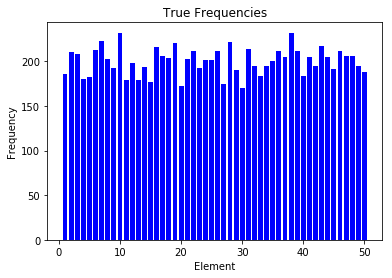

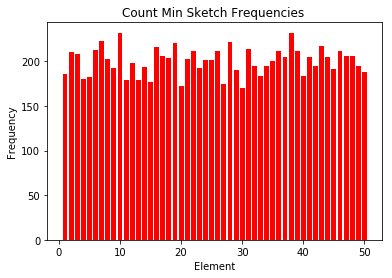

In [36]:
plot_freq1()
plot_freq2()
#print(np.shape(matrix))